0


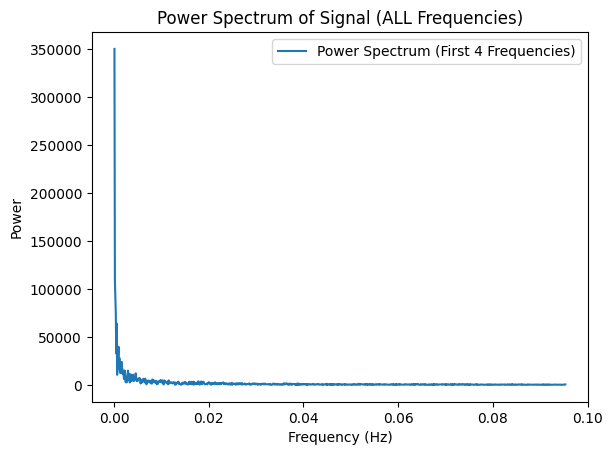

In [9]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from numpy import sin
from math import pi
from scipy.signal import welch

# Load data from the text file
with open('IBM.txt', 'r') as file:
    lines = file.readlines()
    data = []
    dates = []

    for line in lines[1:]:
        parts = line.strip().split(',')
        date = parts[0]
        if '1980-12-12' <= date <= '2022-07-22':
            dates.append(date)
            data.append(float(parts[4]))  # 'Close' column

# Create a DataFrame from the loaded data
df = pd.DataFrame({'Date': pd.to_datetime(dates), 'Value': data})
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
fs = 1 
# Extract the values from the DataFrame
signal = df['Value'].values

def get_fft(signal, fs):
    fourier = np.fft.fft(signal)
    n= len(signal)
    frequencies = np.fft.fftfreq(n, d=1/fs) 
    positive_frequencies = frequencies[np.where(frequencies>0)] 
    magnitudes = abs(fourier[np.where(frequencies >0)])
    return positive_frequencies, magnitudes


positive_frequencies, magnitudes = get_fft(signal, fs)
peak_frequency = np.argmax(magnitudes)
print(peak_frequency)
plt.plot(positive_frequencies[:1000], magnitudes[:1000], label='Power Spectrum (First 4 Frequencies)')
plt.title('Power Spectrum of Signal (ALL Frequencies)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

In [10]:
def en_buyuk_uc_indexleri_bul(array):
    if len(array) < 3:
        print("Dizi en az 3 eleman içermelidir.")
        return
    
    sirali_dizi = sorted(enumerate(array), key=lambda x: x[1], reverse=True)
    en_buyuk_uc_indexler = [index for index, value in sirali_dizi[:20]]
    
    return en_buyuk_uc_indexler

a=[]
a=en_buyuk_uc_indexleri_bul(magnitudes)

print("Power spectrumda En büyük üç değerin index'leri:", a)
for b in a:
    print("En büyük üç değerin frekansları:", positive_frequencies[b])
    print("En büyük üç değerin windowları:", (round(1 / (positive_frequencies[b]))))
    
# NOTE: The dominant periods are too high to be selected as the window size. what can we do about it? ask burak hoca (preprocessing etc.)

Power spectrumda En büyük üç değerin index'leri: [0, 1, 2, 3, 5, 9, 4, 8, 11, 7, 16, 14, 10, 17, 18, 23, 30, 12, 20, 13]
En büyük üç değerin frekansları: 9.53197979220284e-05
En büyük üç değerin windowları: 10491
En büyük üç değerin frekansları: 0.0001906395958440568
En büyük üç değerin windowları: 5246
En büyük üç değerin frekansları: 0.0002859593937660852
En büyük üç değerin windowları: 3497
En büyük üç değerin frekansları: 0.0003812791916881136
En büyük üç değerin windowları: 2623
En büyük üç değerin frekansları: 0.0005719187875321704
En büyük üç değerin windowları: 1749
En büyük üç değerin frekansları: 0.0009531979792202841
En büyük üç değerin windowları: 1049
En büyük üç değerin frekansları: 0.00047659898961014205
En büyük üç değerin windowları: 2098
En büyük üç değerin frekansları: 0.0008578781812982557
En büyük üç değerin windowları: 1166
En büyük üç değerin frekansları: 0.0011438375750643407
En büyük üç değerin windowları: 874
En büyük üç değerin frekansları: 0.0007625583833762

0


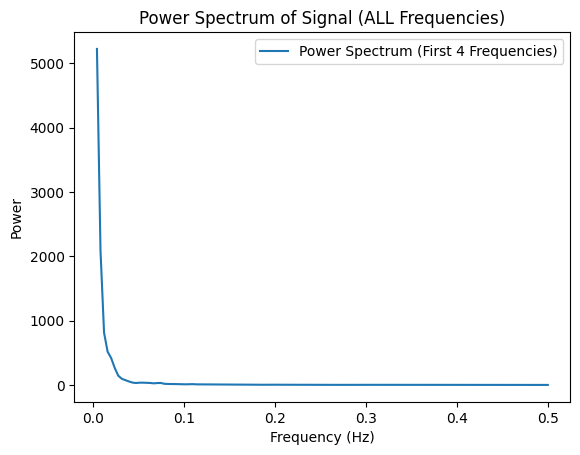

In [11]:
# https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/

def get_psd_values(y_values, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    # return only positive frequencies and respective PSD values
    positive_frequencies = f_values[np.where(f_values>0)]
    positive_psd = psd_values[np.where(f_values>0)]
    return positive_frequencies, positive_psd

positive_frequencies, magnitudes = get_psd_values(signal, fs)
peak_frequency = np.argmax(magnitudes)
print(peak_frequency)
plt.plot(positive_frequencies[:1000], magnitudes[:1000], label='Power Spectrum (First 4 Frequencies)')
plt.title('Power Spectrum of Signal (ALL Frequencies)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

In [12]:
def en_buyuk_uc_indexleri_bul(array):
    if len(array) < 3:
        print("Dizi en az 3 eleman içermelidir.")
        return
    
    sirali_dizi = sorted(enumerate(array), key=lambda x: x[1], reverse=True)
    en_buyuk_uc_indexler = [index for index, value in sirali_dizi[:20]]
    
    return en_buyuk_uc_indexler

a=[]
a=en_buyuk_uc_indexleri_bul(magnitudes)

print("Power spectrumda En büyük üç değerin index'leri:", a)
for b in a:
    print("En büyük üç değerin frekansları:", positive_frequencies[b])
    print("En büyük üç değerin windowları:", (round(1 / (positive_frequencies[b]))))
    
# NOTE: The dominant periods are too high to be selected as the window size. what can we do about it? ask burak hoca (preprocessing etc.)

Power spectrumda En büyük üç değerin index'leri: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 18, 15, 11, 17, 16, 19]
En büyük üç değerin frekansları: 0.00390625
En büyük üç değerin windowları: 256
En büyük üç değerin frekansları: 0.0078125
En büyük üç değerin windowları: 128
En büyük üç değerin frekansları: 0.01171875
En büyük üç değerin windowları: 85
En büyük üç değerin frekansları: 0.015625
En büyük üç değerin windowları: 64
En büyük üç değerin frekansları: 0.01953125
En büyük üç değerin windowları: 51
En büyük üç değerin frekansları: 0.0234375
En büyük üç değerin windowları: 43
En büyük üç değerin frekansları: 0.02734375
En büyük üç değerin windowları: 37
En büyük üç değerin frekansları: 0.03125
En büyük üç değerin windowları: 32
En büyük üç değerin frekansları: 0.03515625
En büyük üç değerin windowları: 28
En büyük üç değerin frekansları: 0.0390625
En büyük üç değerin windowları: 26
En büyük üç değerin frekansları: 0.04296875
En büyük üç değerin windowları: 23
En büyük üç değer